In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
frequency = 20
sample_rate = 64
time = 60
num_samples = sample_rate * time

x = np.linspace(0, time, num_samples)
y = np.sin(frequency * np.pi * 2 * x)

data = np.zeros(num_samples)
data[np.where(y>0.98)] = 1.0


In [26]:
np.where(y>0.98), np.where(data>0.98)

((array([   4,   20,   36,   52,   68,   84,  100,  116,  132,  148,  164,
          180,  196,  212,  228,  244,  260,  276,  292,  308,  324,  340,
          356,  372,  388,  391,  407,  423,  439,  455,  471,  487,  503,
          519,  535,  551,  567,  583,  599,  615,  631,  647,  663,  679,
          695,  711,  727,  743,  759,  775,  791,  807,  823,  839,  855,
          871,  887,  903,  919,  935,  951,  967,  983,  999, 1015, 1031,
         1047, 1063, 1079, 1095, 1111, 1127, 1143, 1146, 1159, 1162, 1178,
         1194, 1210, 1226, 1242, 1258, 1274, 1290, 1306, 1322, 1338, 1354,
         1370, 1386, 1402, 1418, 1434, 1450, 1466, 1482, 1498, 1514, 1530,
         1546, 1562, 1578, 1594, 1610, 1626, 1642, 1658, 1674, 1690, 1706,
         1722, 1738, 1754, 1770, 1786, 1802, 1818, 1834, 1850, 1866, 1882,
         1898, 1914, 1917, 1933, 1949, 1965, 1981, 1997, 2013, 2029, 2045,
         2061, 2077, 2093, 2109, 2125, 2141, 2157, 2173, 2189, 2205, 2221,
         2237, 2253, 2269

In [27]:
fft = np.fft.rfft(y)
fft2 = np.fft.rfft(data - np.mean(data))

/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


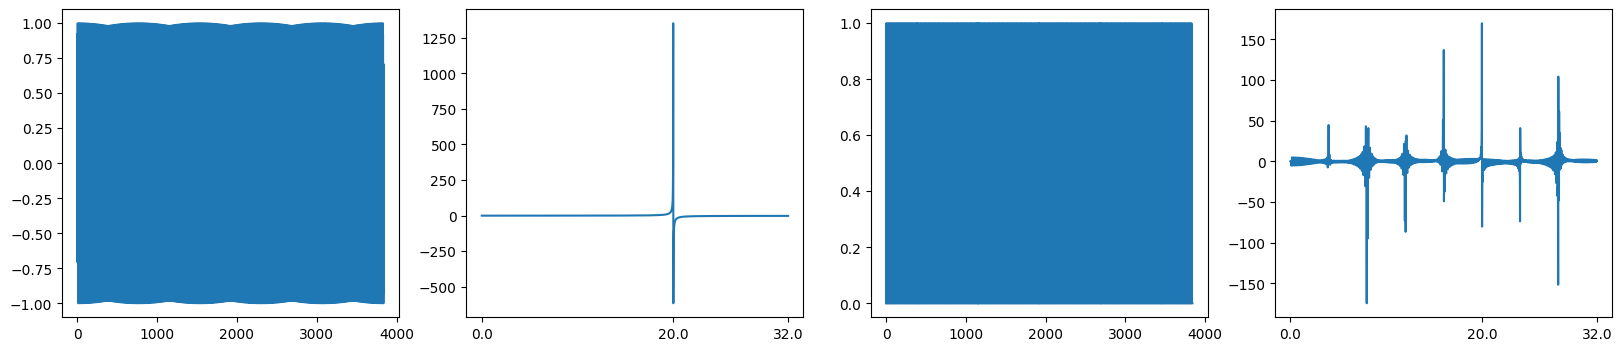

In [28]:
frequencies = np.fft.rfftfreq(n=num_samples, d=1/sample_rate)

figure, axes = plt.subplots(1,4, figsize=(20,4))
axes[0].plot(y)
axes[1].plot(fft)
axes[1].set_xticks([0, fft.argmax(), num_samples//2])
axes[1].set_xticklabels([frequencies[0], frequencies[fft.argmax()], frequencies[num_samples//2]])
axes[2].plot(data)
axes[3].plot(fft2)
axes[3].set_xticks([0, fft2.argmax(), num_samples//2])
axes[3].set_xticklabels([frequencies[0], frequencies[fft2.argmax()], frequencies[num_samples//2]])

plt.show()

/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/dhoelzer/miniforge3/envs/gpu/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


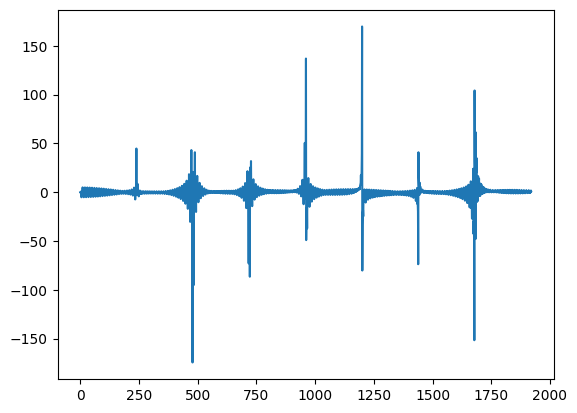

In [29]:
plt.plot(fft2)
plt.show()

In [165]:
help(np.fft.rfftfreq)

Help on function rfftfreq in module numpy.fft:

rfftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies
    (for usage with rfft, irfft).
    
    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.
    
    Given a window length `n` and a sample spacing `d`::
    
      f = [0, 1, ...,     n/2-1,     n/2] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2-1, (n-1)/2] / (d*n)   if n is odd
    
    Unlike `fftfreq` (but like `scipy.fftpack.rfftfreq`)
    the Nyquist frequency component is considered to be positive.
    
    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    
    Returns
    -------
    f : ndarray
        Array of length ``n//2 + 1`` containing the sample fre